In [0]:
import matplotlib.pyplot as plt
import numpy as np

def prepare_plot(xticks, yticks, figsize=(9.5, 5), hide_labels=False, grid_color='#719686',
                 grid_width=2.0):
    """Template for generating the plot layout."""
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='black', edgecolor='black')
    ax.axes.tick_params(labelcolor='#719686', labelsize='9')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#719686')
        if hide_labels: axis.set_ticklabels([])
    plt.grid(color=grid_color, linewidth=grid_width, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

def create_2D_gaussian(mn, variance, cov, n):
    """Randomly sample points from a two-dimensional Gaussian distribution"""
    np.random.seed(142)
    return np.random.multivariate_normal(np.array([mn, mn]), np.array([[variance, cov], [cov, variance]]), n)

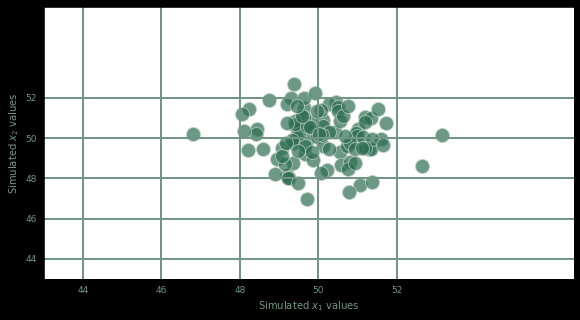

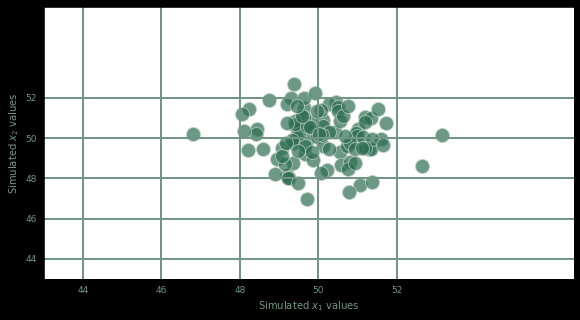

In [0]:
data_random = create_2D_gaussian(mn=50, variance=1, cov=0, n=100)

# generate layout and plot data
fig, ax = prepare_plot(np.arange(42, 53, 2), np.arange(42, 53, 2))
ax.set_xlabel(r'Simulated $x_1$ values'), ax.set_ylabel(r'Simulated $x_2$ values')
ax.set_xlim(43, 56.5), ax.set_ylim(43, 56.5)
plt.scatter(data_random[:,0], data_random[:,1], s=14**2, c='#2e6e51', edgecolors='#c0d1ca', alpha=0.7)
display(fig)

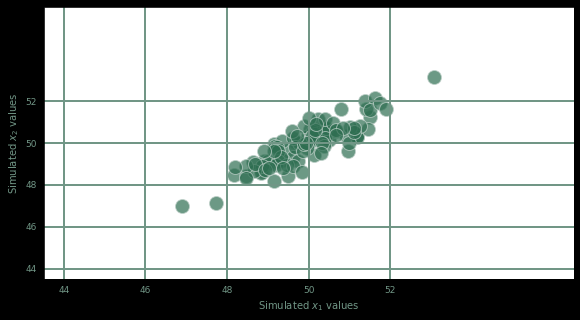

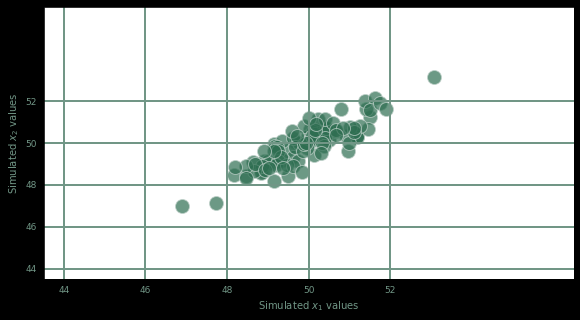

In [0]:
data_correlated = create_2D_gaussian(mn=50, variance=1, cov=.9, n=100)

# generate layout and plot data
fig, ax = prepare_plot(np.arange(42, 53, 2), np.arange(42, 53, 2))
ax.set_xlabel(r'Simulated $x_1$ values'), ax.set_ylabel(r'Simulated $x_2$ values')
ax.set_xlim(43.5, 56.5), ax.set_ylim(43.5, 56.5)
plt.scatter(data_correlated[:,0], data_correlated[:,1], s=14**2, c='#2e6e51',
            edgecolors='#c0d1ca', alpha=0.7)
display(fig)

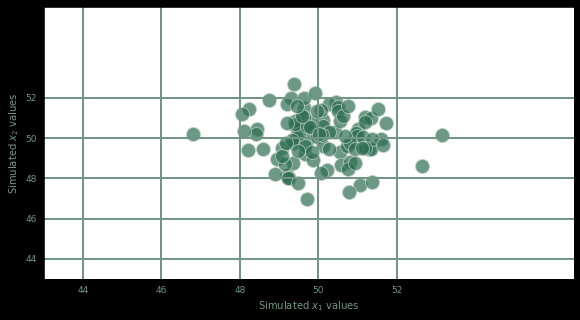

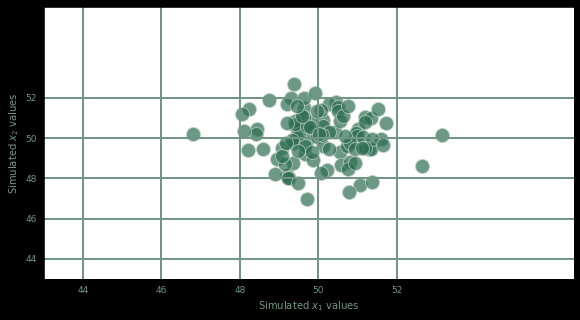

In [0]:
data_random = create_2D_gaussian(mn=50, variance=1, cov=0, n=100)
# generate layout and plot data
fig, ax = prepare_plot(np.arange(42, 53, 2), np.arange(42, 53, 2))
ax.set_xlabel(r'Simulated $x_1$ values'), ax.set_ylabel(r'Simulated $x_2$ values')
ax.set_xlim(43, 56.5), ax.set_ylim(43, 56.5)
plt.scatter(data_random[:,0], data_random[:,1], s=14**2, c='#2e6e51', edgecolors='#c0d1ca', alpha=0.7)
display(fig)

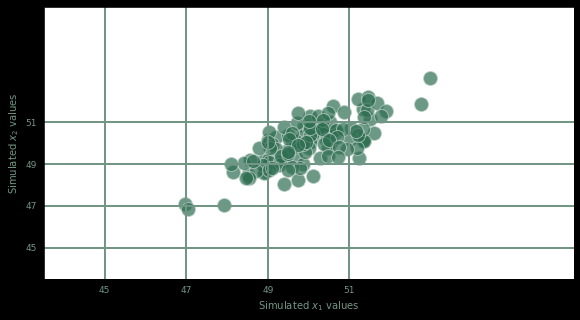

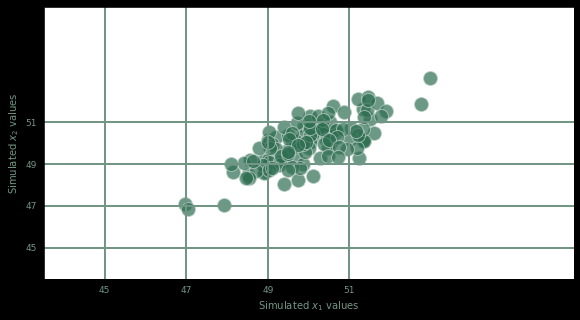

In [0]:
import numpy as np
data_correlated = create_2D_gaussian(mn=50, variance=1, cov=.8, n=120)

# generate layout and plot data
fig, ax = prepare_plot(np.arange(43, 53, 2), np.arange(43, 53, 2))
ax.set_xlabel(r'Simulated $x_1$ values'), ax.set_ylabel(r'Simulated $x_2$ values')
ax.set_xlim(43.5, 56.5), ax.set_ylim(43.5, 56.5)
plt.scatter(data_correlated[:,0], data_correlated[:,1], s=14**2, c='#2e6e51',
            edgecolors='#c0d1ca', alpha=0.7)
display(fig)

In [0]:
# TODO: Replace <FILL IN> with appropriate code
correlated_data = sc.parallelize(data_correlated)
print(type(1))
#mean_correlated = <FILL IN>
mean_correlated = correlated_data.mean()
#correlated_data_zero_mean = correlated_data.<FILL IN>
correlated_data_zero_mean = correlated_data.map(lambda x: x-mean_correlated)
print(type(mean_correlated))
correlated_data.take(1)
correlated_data_zero_mean.take(1)

<class 'int'>
<class 'numpy.ndarray'>
Out[24]: [array([-0.40571521,  0.1391601 ])]

In [0]:
# TODO: Replace <FILL IN> with appropriate code
# Compute the covariance matrix using outer products and correlated_data_zero_mean
#correlated_cov = <FILL IN>
num_data_points = correlated_data_zero_mean.count()
print(type(num_data_points))
correlated_cov = correlated_data_zero_mean.map(lambda x: np.outer(x, x)).sum()/num_data_points  
print(type(correlated_cov))

<class 'int'>
<class 'numpy.ndarray'>
